In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np

# Öneri Sistemleri 

## Problem Tanımı

In [3]:
film=pd.read_csv("data/movies.csv");film.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [4]:
film["tür"]=film.genres.str.strip().str.split('[\W_]+')

In [5]:
satırlar = list()
for row in film[['movieId', 'tür']].iterrows():
    r = row[1]
    for tür in r.tür:
        satırlar.append((r.movieId, tür))

nitelik_df = pd.DataFrame(satırlar, columns=['movieId', 'tür'])
nitelik_listesi=nitelik_df.tür.unique().tolist();nitelik_listesi.remove('');nitelik_listesi
nitelik_df.head(2)

,movieId,tür
0,1,Adventure
1,1,Animation


In [6]:
nitelik_df["say"]=1
nitelik_pivot=pd.pivot_table(nitelik_df, values="say", index=['movieId'],columns=['tür'], aggfunc=np.sum)
nitelik_pivot=pd.pivot_table(nitelik_df, values="say", index=['movieId'],columns=['tür'], aggfunc=np.sum)
nitelik_pivot=nitelik_pivot.reset_index()
nitelik_pivot.drop([''], axis=1,inplace=True)
nitelik_pivot=nitelik_pivot.merge(film[["movieId","title"]],how="left",on="movieId")
# #kelimeler_eklenecek=kelimeler_eklenecek.fillna(0)
derece=pd.read_csv("data/ratings.csv");derece.head(2)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [7]:
eğitim_verisi=derece.merge(film,how="left",on="movieId")[["userId","title","rating"]]
eğitim_verisi_pivot=pd.pivot_table(eğitim_verisi, values="rating", index=['title'],columns=['userId'], aggfunc=np.mean)
eğitim_verisi=eğitim_verisi_pivot.reset_index().merge(nitelik_pivot,how="left",on="title")
eğitim_verisi.drop(['movieId' ], axis=1,inplace=True)

In [8]:
eğitim_verisi.dropna(thresh=250)

,title,1,2,3,4,5,6,7,8,9,...,Mystery,Noir,Romance,Sci,Thriller,War,Western,genres,listed,no
3161,Forrest Gump (1994),4.0,NaN,NaN,NaN,NaN,5.0,5.0,3.0,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
5515,"Matrix, The (1999)",5.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
6868,Pulp Fiction (1994),3.0,NaN,NaN,1.0,5.0,2.0,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
7597,"Shawshank Redemption, The (1994)",NaN,3.0,NaN,NaN,3.0,5.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7684,"Silence of the Lambs, The (1991)",4.0,NaN,NaN,5.0,NaN,4.0,5.0,4.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
8005,Star Wars: Episode IV - A New Hope (1977),5.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


##  Örnek Film- İzleyici (Kullanıcı) Puan Tahmini

### Notasyon


<br>

<p style="font-size:100%;">  $n_u$  : Kullanıcı Sayısı  </p>

<p style="font-size:100%;"> $ n_m $ : Film Sayısı </p>

<p style="font-size:100%;">  Film indisi= $i$ ,   kullanıcı indisi=$j $  </p>

<p style="font-size:100%;"> $ r_{(i,j)} $ : Eğer kullanıcı filmi puanladı ise 1 </p>

<p style="font-size:100%;"> $y_{(i,j)}$  : indis $(i,j)=1$ iken verilen puanın değeri</p> <br>

 



![image.png](data/yıldız.png)

In [9]:
nu=len(eğitim_verisi.columns)-len(nitelik_listesi);print("Kullanıcı Sayısı" ,nu,"kişidir.")

Kullanıcı Sayısı 611 kişidir.


In [10]:
nm=eğitim_verisi.shape[0];print("Film Sayısı" ,nm,"kişidir.")

Film Sayısı 9724 kişidir.


In [11]:
eğitim_verisi.dropna(thresh=200)[["title"]+nitelik_listesi].head(5)

,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,...,War,Musical,Documentary,IMAX,Western,Film,Noir,no,genres,listed
405,American Beauty (1999),NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,Apollo 13 (1995),1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1337,Braveheart (1995),NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3014,Fight Club (1999),NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3161,Forrest Gump (1994),NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## İçerik Üzerinden Puanlama

### Problemin Formulleştirilmesi

 <br>

<p style="font-size:120%;">   Her bir kullanıcı için katsayısı ($\theta$) öğrenilir. Ardından bu katsayılar ile niteliklerin (x) değerleri çarpılarak tahmini puanlar hesaplanır.</p> 
 <br>


<p style="font-size:150%;"> Formül : $   (\theta^j)^T *x_i $ </p> 



 

<p style="font-size:120%;">  $r^{(i,j)}$ : Eğer kullanıcı filmi puanladı ise 1 </p>


<p style="font-size:120%;">$y^{(i,j)}$  : indis (i,j)=1 iken verilen puanın değeri</p> <br>


<p style="font-size:120%;">  $\theta^{(j)}$  : j kullanıcı için katsayı vektörü </p> <br>

<p style="font-size:120%;">  $x^{(i)}$  : i filmi  için nitelik vektörü </p> <br>
<p style="font-size:120%;">  Her bir kullanıcı için tahmini puan $  (\theta^{(j)})^T *x_i$  </p> 
<p style="font-size:120%;">  $  m^{(j)} $:  $j$ kullanıcısı tarafından puanlanan toplam film adedi    </p> 
 


<p style="font-size:120%;">  j kullanıcısı için katsayı($\theta_j$) hesaplanması : </p> 

<p style="font-size:120%;">  $min_{\theta^{(j)}} 1/2 \begin{equation}\sum_{i:r(i,j)=1} ((\theta^j)^T *x_i - y^{(i,j)})^2 \end{equation} $ </p>

<p style="font-size:120%;">  $min_{\theta^j} 1/2 \begin{equation}\sum_{i:r(i,j)=1} ((\theta^j)^T *x_i - y^{(i,j)})^2 \ + \lambda/2 \sum_{k=1}^n (\theta_k^j)^2 \end{equation} $ </p>

### Optimizasyon Hedefi

<p style="font-size:120%;">*   $ \theta^{(j)} $ katsayısını j kullanıcısı için hesaplamak için kullanılacak formül :   </p>
<p style="font-size:120%;">  $min_{\theta^j} 1/2 \begin{equation}\sum_{i:r(i,j)=1} ((\theta^j)^T *x_i - y^{(i,j)})^2 \ + \lambda/2 \sum_{k=1}^n (\theta_k^j)^2 \end{equation} $ </p>

<p style="font-size:120%;"> * $ \theta^{(1)} ,\theta^{(2)} ,\theta^{(3)},...,\theta^{(n_u)} $ katsayılarını için hesaplamak için kullanılacak formül :   </p>
<p style="font-size:120%;">  $min_{\theta^{(1)} ,..,\theta^{(n_u)}} 1/2 \begin{equation}\sum_{i:r(i,j)=1} ((\theta^j)^T *x_i - y^{(i,j)})^2 \ + \lambda/2 \sum_{j=1}^{n_u}  \sum_{k=1}^n (\theta_k^j)^2 \end{equation} $ </p>

### Optimizasyon Algoritması

<p style="font-size:120%;">  \begin{equation}   J_{(\theta^{(1)} ,..,\theta^{(n_u)})}=1/2*\sum_{i:r(i,j)=1} ((\theta^j)^T *x_i - y^{(i,j)})^2 \ + \lambda/2 \sum_{j=1}^{n_u}  \sum_{k=1}^n (\theta_k^j)^2 \end{equation}   </p>

<p style="font-size:120%;"> Dereceli Azaltma:     </p>

<p style="font-size:120%;">\begin{equation}\ \theta_k^{(j)}      := \theta_k^{(j)}-a*\sum_{i:r(i,j)=1} ((\theta^{(j)})^T *x^{(i)} - y^{(i,j)})*x^{(i)} \ \    \    \       \ (k=0  \    \ için)  \end{equation}</p>

<p style="font-size:120%;">\begin{equation}\ \theta_k^{(j)}      := \theta_k^{(j)}-a*(\sum_{i:r(i,j)=1} ((\theta^{(j)})^T *x^{(i)} - y^{(i,j)})*x^{(i)} + \lambda*\theta_k^{(j)} )\ \    \    \       \  (k\neq0  \    \ için)  \end{equation}</p>


<p style="font-size:120%;">\begin{equation}\  \frac{\partial J(\theta_0,\theta_1,...\theta_n)}{\partial \theta_k^{(j)}}=(\sum_{i:r(i,j)=1} ((\theta^{(j)})^T *x^{(i)} - y^{(i,j)})*x^{(i)} + \lambda*\theta_k^{(j)} )\     \end{equation}</p>

### İşbirliğine Dayalı Filtreleme (collaborative filtering)

In [12]:
örnek_listesi=["title", 610 , 448 , 599 , 474 , 414,380,274,606,"Thriller",  "Comedy","Drama","Action","Romance" ]  
örnek_veri=eğitim_verisi[örnek_listesi].dropna(thresh=11)
örnek_veri.set_index(["title"],inplace=True);örnek_veri.head(5)

,610,448,599,474,414,380,274,606,Thriller,Comedy,Drama,Action,Romance
title,,,,,,,,,,,,,
Apocalypse Now (1979),5.0,4.0,5.0,3.5,5.0,4.0,4.0,4.5,NaN,NaN,1.0,1.0,NaN
Batman (1989),4.5,3.0,3.5,4.0,4.0,3.0,3.0,3.5,1.0,NaN,NaN,1.0,NaN
Beverly Hills Cop (1984),NaN,5.0,3.5,2.0,4.0,4.0,4.0,2.5,NaN,1.0,1.0,1.0,NaN
Big (1988),NaN,4.0,3.5,4.0,4.0,3.0,3.0,3.0,NaN,1.0,1.0,NaN,1.0
Blade Runner (1982),5.0,4.0,4.5,3.0,5.0,5.0,2.5,5.0,1.0,NaN,NaN,1.0,NaN



    
    
    
  
    
<p style="font-size:180%;">    Nitelik Listesi </p>     
<p style="font-size:120%;">      *Thriller(x1) </p> 
<p style="font-size:120%;">     *Comedy(x2) </p> 
<p style="font-size:120%;">      *Drama(x3)  </p> 
<p style="font-size:120%;">      *Action(x4) </p> 
<p style="font-size:120%;">       *Romance(x5) </p> 

In [13]:
örnek_veri.rename(columns={"Thriller": "Thriller(x1)", "Comedy": "Comedy(x2)","Drama": "Drama(x3)","Action": "Action(x4)","Romance": "Romance(x5)"},inplace=True)
örnek_veri.rename(columns={ 610 : "610(theta0)",  448 : "448(theta1)",599: "599(theta2)",474: "474(theta3)",414: "414(theta4)",380:"380(theta5)",274:"274(theta6)",606:"606(theta7)"},inplace=True)
örnek_kullanıcı_listesi=[  "610(theta0)",   "448(theta1)",  "599(theta2)",  "474(theta3)",  "414(theta4)", "380(theta5)",  "274(theta6)", "606(theta7)"]
örnek_nitelik_listesi=["Yanlılık(x0)","Thriller(x1)" ,"Comedy(x2)", "Drama(x3)","Action(x4)", "Romance(x5)"]
örnek_veri["Yanlılık(x0)"]=1
örnek_veri=örnek_veri[örnek_kullanıcı_listesi+örnek_nitelik_listesi];örnek_veri.head(5)

,610(theta0),448(theta1),599(theta2),474(theta3),414(theta4),380(theta5),274(theta6),606(theta7),Yanlılık(x0),Thriller(x1),Comedy(x2),Drama(x3),Action(x4),Romance(x5)
title,,,,,,,,,,,,,,
Apocalypse Now (1979),5.0,4.0,5.0,3.5,5.0,4.0,4.0,4.5,1,NaN,NaN,1.0,1.0,NaN
Batman (1989),4.5,3.0,3.5,4.0,4.0,3.0,3.0,3.5,1,1.0,NaN,NaN,1.0,NaN
Beverly Hills Cop (1984),NaN,5.0,3.5,2.0,4.0,4.0,4.0,2.5,1,NaN,1.0,1.0,1.0,NaN
Big (1988),NaN,4.0,3.5,4.0,4.0,3.0,3.0,3.0,1,NaN,1.0,1.0,NaN,1.0
Blade Runner (1982),5.0,4.0,4.5,3.0,5.0,5.0,2.5,5.0,1,1.0,NaN,NaN,1.0,NaN


In [14]:
# X matrix
örnek_veri[örnek_nitelik_listesi].head()

,Yanlılık(x0),Thriller(x1),Comedy(x2),Drama(x3),Action(x4),Romance(x5)
title,,,,,,
Apocalypse Now (1979),1,NaN,NaN,1.0,1.0,NaN
Batman (1989),1,1.0,NaN,NaN,1.0,NaN
Beverly Hills Cop (1984),1,NaN,1.0,1.0,1.0,NaN
Big (1988),1,NaN,1.0,1.0,NaN,1.0
Blade Runner (1982),1,1.0,NaN,NaN,1.0,NaN


In [15]:
# x^0

x0=örnek_veri.loc["Apocalypse Now (1979)",örnek_nitelik_listesi];x0

Yanlılık(x0)    1.0
Thriller(x1)    NaN
Comedy(x2)      NaN
Drama(x3)       1.0
Action(x4)      1.0
Romance(x5)     NaN
Name: Apocalypse Now (1979), dtype: float64

In [16]:
x0.fillna(0)

Yanlılık(x0)    1.0
Thriller(x1)    0.0
Comedy(x2)      0.0
Drama(x3)       1.0
Action(x4)      1.0
Romance(x5)     0.0
Name: Apocalypse Now (1979), dtype: float64

In [17]:
# theta^0 = ? 
theta0=np.array([1,2,3,3,1,2]);theta0

array([1, 2, 3, 3, 1, 2])

$(\theta^{(0)})^T *x^{(0)}$

In [18]:
np.dot(theta0.T,x0.fillna(0))

5.0

In [19]:
# 610 kullanıcı 5 puan vermişti.
örnek_veri.loc["Apocalypse Now (1979)","610(theta0)"]

5.0

In [20]:
theta1=np.array([0,2,3,3,1,2]);theta1

array([0, 2, 3, 3, 1, 2])

$(\theta^{(1)})^T *x^{(0)}$

In [21]:
np.dot(theta1.T,x0.fillna(0))

4.0

In [22]:
# 448 kullanıcı 4 puan vermişti.
örnek_veri.loc["Apocalypse Now (1979)","448(theta1)"]

4.0

### Nitelik için Optimizasyon Algoritması

<p style="font-size:120%;">    $x^{(i)}$ niteliklerini  $\theta_0,\theta_1,...\theta_n$ bilinirken  için hesaplamak için kullanılacak formül :    </p>
<p style="font-size:120%;">  \begin{equation}   min_{(x^{(i)})} \   \ 1/2*\sum_{i:r(i,j)=1} ((\theta^j)^T *x_i - y^{(i,j)})^2 \ + \lambda/2 \sum_{k=1}^n (x_k^{(i)})^2 \end{equation}   </p>

<p style="font-size:120%;">    $x^{(1)},x^{(2)},x^{(3)},..,x^{(m)}$ niteliklerini  $\theta_0,\theta_1,...\theta_n$ bilinirken  için hesaplamak için kullanılacak formül :    </p>
<p style="font-size:120%;">  \begin{equation}  min_{ x^{(1)},x^{(2)},x^{(3)},..,x^{(m)} } \   \ 1/2*\sum_{i:r(i,j)=1} ((\theta^j)^T *x_i - y^{(i,j)})^2 \ + \lambda/2 \sum_{i=1}^{n_m}  \sum_{k=1}^n (x_k^{(i)})^2 \end{equation}   </p>

### Sonuç olarak : İşbirliğine Dayalı Filtreleme (collaborative filtering)

<p style="font-size:120%;">    $x^{(1)},x^{(2)},x^{(3)},..,x^{(m)}$ niteliklerini biliyorsak ,  $\theta_0,\theta_1,...\theta_n$ katsayılarını hesaplayabiliriz.    </p>

<p style="font-size:120%;">    $\theta_0,\theta_1,...\theta_n$ katsayılarını biliyorsak ,  $x^{(1)},x^{(2)},x^{(3)},..,x^{(m)}$   niteliklerini hesaplayabiliriz    </p>

<p style="font-size:120%;"> Tahminimiz :    $\theta -> x->\theta -> x->\theta -> x->\theta -> ... $ şeklinde olacaktır.    </p>

###  İşbirliğine Dayalı Filtreleme (collaborative filtering) Optimizasyon Hedefi 

<p style="font-size:120%;">  $x^{(1)},x^{(2)},x^{(3)},..,x^{(m)}$ niteliklerini  bilirken  $ \theta^{(1)} ,\theta^{(2)} ,\theta^{(3)},...,\theta^{(n_u)} $ katsayılarını için hesaplamak için kullanılacak formül :</p>
<p style="font-size:120%;">  $min_{\theta^{(1)} ,..,\theta^{(n_u)}} 1/2 \begin{equation}\sum_{i:r(i,j)=1} ((\theta^j)^T *x_i - y^{(i,j)})^2 \ + \lambda/2 \sum_{j=1}^{n_u}  \sum_{k=1}^n (\theta_k^j)^2 \end{equation} $ </p>

 <p style="font-size:120%;">   $ \theta^{(1)} ,\theta^{(2)} ,\theta^{(3)},...,\theta^{(n_u)} $   katsayılarını  bilirken $x^{(1)},x^{(2)},x^{(3)},..,x^{(m)}$ niteliklerini için hesaplamak için kullanılacak formül :</p>
<p style="font-size:120%;">  $ min_{ x^{(1)},x^{(2)},x^{(3)},..,x^{(m)} }   1/2* \begin{equation}  \sum_{i:r(i,j)=1} ((\theta^j)^T *x_i - y^{(i,j)})^2 \ + \lambda/2 \sum_{i=1}^{n_m}  \sum_{k=1}^n (x_k^{(i)})^2 \end{equation}   $ </p>

 <p style="font-size:120%;">   Aynı anda $ \theta^{(1)} ,\theta^{(2)} ,\theta^{(3)},...,\theta^{(n_u)} $   ve  $x^{(1)},x^{(2)},x^{(3)},..,x^{(m)}$ minimize etmek için :</p>
<p style="font-size:120%;">  $ min_{( x^{(1)},..,x^{(m)}) ,(\theta^{(1)} ,..,\theta^{(n_u)}) }   1/2* \begin{equation}  \sum_{i:r(i,j)=1} ((\theta^j)^T *x_i - y^{(i,j)})^2 \ + \lambda/2 \sum_{i=1}^{n_m}  \sum_{k=1}^n (x_k^{(i)})^2+ \lambda/2 \sum_{j=1}^{n_u}  \sum_{k=1}^n (\theta_k^j)^2  \end{equation}   $ </p>



###  İşbirliğine Dayalı Filtreleme (collaborative filtering) Algoritması

<p style="font-size:120%;"> 1.     $x^{(1)},x^{(2)},x^{(3)},..,x^{(m)}$ , $ \theta^{(1)} ,\theta^{(2)} ,\theta^{(3)},...,\theta^{(n_u)} $ parametrelerine ufak rastgele sayılar atanır . </p>

<p style="font-size:120%;"> 2.     $ J( x^{(1)},..,x^{(m)}) ,(\theta^{(1)} ,..,\theta^{(n_u)}) $ değerini minimize etmek için "dereceli azaltma" veya "ileri optimizasyon" kullanılır.  Bu  parametrelere başlangıçta ufak rastgele sayılar atanır . </p>

<p style="font-size:120%;">\begin{equation}\  x_k^{(i)}      := x_k^{(i)}-a*(\sum_{i:r(i,j)=1} ((\theta^{(j)})^T *x^{(i)} - y^{(i,j)})*\theta_k^{(j)} + \lambda*x_k^{(i)})\  \end{equation}</p>


<p style="font-size:120%;">\begin{equation}\ \theta_k^{(j)}      := \theta_k^{(j)}-a*(\sum_{i:r(i,j)=1} ((\theta^{(j)})^T *x^{(i)} - y^{(i,j)})*x^{(i)} + \lambda*\theta_k^{(j)} )\  \end{equation}</p>

<p style="font-size:120%;">3. $\theta$ katsayısına sahip kullanıcı ve $x$ nitelikleri hesaplanmış bir film için tahmini fill puanı $(\theta^T *x)$'e eşittir. </p>

###  Vektörleştirme : Düşük Rank Matris Faktorizasyonu (Vectorization : Low rank matrix factorization)

In [23]:
örnek_veri.head(3)

,610(theta0),448(theta1),599(theta2),474(theta3),414(theta4),380(theta5),274(theta6),606(theta7),Yanlılık(x0),Thriller(x1),Comedy(x2),Drama(x3),Action(x4),Romance(x5)
title,,,,,,,,,,,,,,
Apocalypse Now (1979),5.0,4.0,5.0,3.5,5.0,4.0,4.0,4.5,1,NaN,NaN,1.0,1.0,NaN
Batman (1989),4.5,3.0,3.5,4.0,4.0,3.0,3.0,3.5,1,1.0,NaN,NaN,1.0,NaN
Beverly Hills Cop (1984),NaN,5.0,3.5,2.0,4.0,4.0,4.0,2.5,1,NaN,1.0,1.0,1.0,NaN


In [24]:
y=örnek_veri[örnek_kullanıcı_listesi];y.head(3)

,610(theta0),448(theta1),599(theta2),474(theta3),414(theta4),380(theta5),274(theta6),606(theta7)
title,,,,,,,,
Apocalypse Now (1979),5.0,4.0,5.0,3.5,5.0,4.0,4.0,4.5
Batman (1989),4.5,3.0,3.5,4.0,4.0,3.0,3.0,3.5
Beverly Hills Cop (1984),NaN,5.0,3.5,2.0,4.0,4.0,4.0,2.5


In [25]:
nm=y.shape[0]; nu=y.shape[1] ; print("Film adedi:",nm,"Kullanıcı sayısı :",nu)

Film adedi: 44 Kullanıcı sayısı : 8


In [26]:
# İşbirliğine Dayalı Filtreleme 

<p style="font-size:150%;">   y için Tahmini Değerleri aşağıda  görebilirsiniz </p><br>

<p style="font-size:150%;"> $ (\theta^{(1)})^T *x^{(1)} \     \  |    \ (\theta^{(2)})^T *x^{(1)} \  \  |   ...   |  \  \   (\theta^{(n_u)})^T *x^{(1)}$ </p>

<p style="font-size:150%;"> $ (\theta^{(1)})^T *x^{(1)} \     \  |    \ (\theta^{(2)})^T *x^{(2)} \  \  |   ...   |  \  \   (\theta^{(n_u)})^T *x^{(1)}$ </p>

<pre style="font-size:150%;">   .    |      .      |...|      .     </pre>

<pre style="font-size:150%;">   .    |      .      |...|      .     </pre>

<p style="font-size:150%;"> $ (\theta^{(1)})^T *x^{(n_m)} \    |    \ (\theta^{(2)})^T *x^{(n_m)} \  \  |   ...   |  \  \   (\theta^{(n_u)})^T *x^{(n_m)}$ </p>

X = \begin{bmatrix} - & (x^{(1)})^T & - \\ & \vdots & \\ - & (x^{(n_m)} & - \end{bmatrix}   

$ \Theta$ = \begin{bmatrix} - & (\theta^{(1)})^T & - \\ & \vdots & \\ - & (\theta^{(n_u)} & - \end{bmatrix}

$X\Theta^T$ = \begin{bmatrix} (x^{(1)})^T(\theta^{(1)}) & \ldots & (x^{(1)})^T(\theta^{(n_u)})\\ \vdots & \ddots & \vdots \\ (x^{(n_m)})^T(\theta^{(1)}) & \ldots & (x^{(n_m)})^T(\theta^{(n_u)})\end{bmatrix}

###  Yakın Filmleri Bulabilmek

<p style="font-size:120%;"> Her bir i değeri (film için) bir $x^{(i)}$ vektörü buluyoruz. </p>

In [27]:
x=örnek_veri[örnek_nitelik_listesi]

In [28]:
x.loc["Kill Bill: Vol. 1 (2003)",:]

Yanlılık(x0)    1.0
Thriller(x1)    1.0
Comedy(x2)      NaN
Drama(x3)       NaN
Action(x4)      1.0
Romance(x5)     NaN
Name: Kill Bill: Vol. 1 (2003), dtype: float64

<p style="font-size:120%;"> Öyleyse bir i. filme yakın j. filmi nasıl bulabiliriz ?   </p>



<p style="font-size:120%;">Filmlerin vektörel değerleri olduğu için birbirine en yakın iki vektor en yakın filmler olacaktır. </p>



<p style="font-size:120%;">  En küçük $|| x^{(i)}- x^{(j)} ||$ uzaklığı bize filmlerin yakın olduğunu verir.  </p>


<p style="font-size:120%;">   $j $ ye en yakın 5 filmi   $|| x^{(i)}- x^{(j)} ||$ küçükten büyüğe sıralı 5 film alarak bulabiliriz.  </p>

###  Uygulama Notu : Ortalama ile Normalleştirme 

In [29]:
indeks=["Collateral (2004)","Face/Off (1997)", "Fargo (1996)","Knight's Tale, A (2001)" , "Speed (1994)"]
normal_veri=y.loc[indeks,];normal_veri

,610(theta0),448(theta1),599(theta2),474(theta3),414(theta4),380(theta5),274(theta6),606(theta7)
title,,,,,,,,
Collateral (2004),4.5,3.0,3.0,3.5,4.0,5.0,3.0,NaN
Face/Off (1997),3.5,3.0,3.5,4.5,3.0,5.0,4.0,NaN
Fargo (1996),4.5,4.0,3.5,4.0,5.0,4.0,3.0,NaN
"Knight's Tale, A (2001)",3.0,4.0,3.0,3.0,3.0,3.0,2.5,NaN
Speed (1994),5.0,4.0,3.0,4.0,4.0,5.0,3.5,NaN


In [30]:
mu=np.array(normal_veri.mean(axis=1,skipna=True))

In [31]:
mu 

array([3.71428571, 3.78571429, 4.        , 3.07142857, 4.07142857])

In [32]:
for i in normal_veri.columns:
     normal_veri[i]=normal_veri[i]-mu

In [33]:
normal_veri

,610(theta0),448(theta1),599(theta2),474(theta3),414(theta4),380(theta5),274(theta6),606(theta7)
title,,,,,,,,
Collateral (2004),0.785714,-0.714286,-0.714286,-0.214286,0.285714,1.285714,-0.714286,NaN
Face/Off (1997),-0.285714,-0.785714,-0.285714,0.714286,-0.785714,1.214286,0.214286,NaN
Fargo (1996),0.500000,0.000000,-0.500000,0.000000,1.000000,0.000000,-1.000000,NaN
"Knight's Tale, A (2001)",-0.071429,0.928571,-0.071429,-0.071429,-0.071429,-0.071429,-0.571429,NaN
Speed (1994),0.928571,-0.071429,-1.071429,-0.071429,-0.071429,0.928571,-0.571429,NaN


<p style="font-size:120%;"> j. kullanıcı  ve i. film için tahmini fill puanı $(\theta^{(j)})^T *x^{(i)}+ \mu_i$'ya  eşittir. </p>

In [34]:
theta7=np.array([0,0,0,0,0,0])

In [35]:
x_normal_veri=x.loc[indeks,].fillna(0)

In [36]:
x_normal_veri

,Yanlılık(x0),Thriller(x1),Comedy(x2),Drama(x3),Action(x4),Romance(x5)
title,,,,,,
Collateral (2004),1,1.0,0.0,1.0,1.0,0.0
Face/Off (1997),1,1.0,0.0,1.0,1.0,0.0
Fargo (1996),1,1.0,1.0,1.0,0.0,0.0
"Knight's Tale, A (2001)",1,0.0,1.0,0.0,1.0,1.0
Speed (1994),1,1.0,0.0,0.0,1.0,1.0


In [37]:
normal_veri["606(theta7)"]=np.dot(theta7,x_normal_veri.T)+mu

In [38]:
normal_veri

,610(theta0),448(theta1),599(theta2),474(theta3),414(theta4),380(theta5),274(theta6),606(theta7)
title,,,,,,,,
Collateral (2004),0.785714,-0.714286,-0.714286,-0.214286,0.285714,1.285714,-0.714286,3.714286
Face/Off (1997),-0.285714,-0.785714,-0.285714,0.714286,-0.785714,1.214286,0.214286,3.785714
Fargo (1996),0.500000,0.000000,-0.500000,0.000000,1.000000,0.000000,-1.000000,4.000000
"Knight's Tale, A (2001)",-0.071429,0.928571,-0.071429,-0.071429,-0.071429,-0.071429,-0.571429,3.071429
Speed (1994),0.928571,-0.071429,-1.071429,-0.071429,-0.071429,0.928571,-0.571429,4.071429


###  Örnek Uygulama

In [39]:
örnek_veri.shape

(44, 14)

In [40]:
örnek_nitelik_listesi

['Yanlılık(x0)',
 'Thriller(x1)',
 'Comedy(x2)',
 'Drama(x3)',
 'Action(x4)',
 'Romance(x5)']

In [41]:
örnek_kullanıcı_listesi

['610(theta0)',
 '448(theta1)',
 '599(theta2)',
 '474(theta3)',
 '414(theta4)',
 '380(theta5)',
 '274(theta6)',
 '606(theta7)']

In [42]:
örnek_film_listesi=örnek_veri.index.tolist();örnek_film_listesi[:5]

['Apocalypse Now (1979)',
 'Batman (1989)',
 'Beverly Hills Cop (1984)',
 'Big (1988)',
 'Blade Runner (1982)']

In [43]:
örnek_veri.head()

,610(theta0),448(theta1),599(theta2),474(theta3),414(theta4),380(theta5),274(theta6),606(theta7),Yanlılık(x0),Thriller(x1),Comedy(x2),Drama(x3),Action(x4),Romance(x5)
title,,,,,,,,,,,,,,
Apocalypse Now (1979),5.0,4.0,5.0,3.5,5.0,4.0,4.0,4.5,1,NaN,NaN,1.0,1.0,NaN
Batman (1989),4.5,3.0,3.5,4.0,4.0,3.0,3.0,3.5,1,1.0,NaN,NaN,1.0,NaN
Beverly Hills Cop (1984),NaN,5.0,3.5,2.0,4.0,4.0,4.0,2.5,1,NaN,1.0,1.0,1.0,NaN
Big (1988),NaN,4.0,3.5,4.0,4.0,3.0,3.0,3.0,1,NaN,1.0,1.0,NaN,1.0
Blade Runner (1982),5.0,4.0,4.5,3.0,5.0,5.0,2.5,5.0,1,1.0,NaN,NaN,1.0,NaN


In [44]:
y=örnek_veri[örnek_kullanıcı_listesi];y.head(2)

,610(theta0),448(theta1),599(theta2),474(theta3),414(theta4),380(theta5),274(theta6),606(theta7)
title,,,,,,,,
Apocalypse Now (1979),5.0,4.0,5.0,3.5,5.0,4.0,4.0,4.5
Batman (1989),4.5,3.0,3.5,4.0,4.0,3.0,3.0,3.5


In [45]:
x=örnek_veri[örnek_nitelik_listesi];x.head(2)

,Yanlılık(x0),Thriller(x1),Comedy(x2),Drama(x3),Action(x4),Romance(x5)
title,,,,,,
Apocalypse Now (1979),1,NaN,NaN,1.0,1.0,NaN
Batman (1989),1,1.0,NaN,NaN,1.0,NaN


In [46]:
def normal(y):
    ynormal=y.copy()
    yort=np.array(y.mean(axis=1,skipna=True))
    for i in y.columns:
        ynormal[i]=y[i]-yort    
    return ynormal,yort

In [47]:
from random import seed
from random import random
x=örnek_veri[örnek_nitelik_listesi];indeks_x=x.index; 
seed(23)
xr=pd.DataFrame( np.random.random((x.shape[0], x.shape[1])))
x_veri=np.array(((np.array((np.isnan(x))*1)*xr)+1))
x=pd.DataFrame(x_veri,index=indeks_x,columns=örnek_nitelik_listesi)
x.head(5)

,Yanlılık(x0),Thriller(x1),Comedy(x2),Drama(x3),Action(x4),Romance(x5)
title,,,,,,
Apocalypse Now (1979),1.0,1.681713,1.093315,1.000000,1.000000,1.694306
Batman (1989),1.0,1.000000,1.505116,1.429730,1.000000,1.105238
Beverly Hills Cop (1984),1.0,1.175035,1.000000,1.000000,1.000000,1.370992
Big (1988),1.0,1.463401,1.000000,1.000000,1.180712,1.000000
Blade Runner (1982),1.0,1.000000,1.517863,1.485885,1.000000,1.612881


In [48]:
theta_=pd.DataFrame( np.random.random((len(x.columns), len(y.columns))),index=x.columns,columns=y.columns);theta_.head()

,610(theta0),448(theta1),599(theta2),474(theta3),414(theta4),380(theta5),274(theta6),606(theta7)
Yanlılık(x0),0.025998,0.726296,0.432509,0.769487,0.525178,0.533492,0.075324,0.870970
Thriller(x1),0.275521,0.222300,0.377588,0.068684,0.287197,0.142902,0.607579,0.440379
Comedy(x2),0.743230,0.100741,0.275968,0.706631,0.393330,0.083925,0.001394,0.709618
Drama(x3),0.601073,0.230570,0.050005,0.736538,0.363863,0.332068,0.794163,0.080634
Action(x4),0.050750,0.049623,0.933367,0.011157,0.769631,0.690714,0.735637,0.710220


In [49]:
def bedel(param,y_norm,n,lambda_):
    nm=y.shape[0]
    nu=y.shape[1]
    r=-np.isnan(y)*1
    X=param[:nm*n].reshape(nm,n) 
    theta_=param[nm*n:].reshape(n,nu)
    J= (1/2)*np.sum(np.sum(np.multiply(r,((np.dot(X,theta_)-y))**2)))+(lambda_/2)*np.sum(np.sum(np.multiply(X,X)))+(lambda_/2)*np.sum(np.sum(np.multiply(theta_,theta_)))
    return J 

In [50]:
param=np.array(np.concatenate(x.values).tolist()+np.concatenate(theta_.values).tolist())

In [51]:
n=x.shape[1] # nitelik adedi
r=-np.isnan(y)*1 # puanlı liste
m=r.sum(axis=0) # her bir kullanıcının puanladığı film adedi
lambda_=0.1 # düzenlileştirme katsayısı

In [52]:
y_norm,y_ort=normal(y)

In [53]:
bedel(param,y_norm,n,lambda_)

314.96721517303433

In [54]:
def derece(param,y_norm,n,lambda_):
    
    nm=y.shape[0]
    
    nu=y.shape[1]
    
    r=-np.isnan(y_norm)*1
    
    y_norm=y_norm.fillna(0)
    
    X=param[:nm*n].reshape(nm,n) 

    theta_=param[nm*n:].reshape(n,nu)
    
    X_derece =  np.dot(np.multiply(r,((np.dot(X,theta_)-y_norm))) ,theta_.T)+  lambda_*X
    
    theta_derece =  np.dot(X.T, np.multiply(r,((np.dot(X,theta_)-y_norm))))+  lambda_*theta_
    
    derece_=np.array(np.concatenate(X_derece).tolist()+np.concatenate(theta_derece).tolist())
    
    return derece_

In [55]:
# Öğrenme Hızını Biraz Büyük Seciyoruz a = np.power(1/10,3)


x=örnek_veri[örnek_nitelik_listesi];indeks_x=x.index; 
seed(23)
xr=pd.DataFrame( np.random.random((x.shape[0], x.shape[1])))
x_veri=np.array(((np.array((np.isnan(x))*1)*xr)+1))
x=pd.DataFrame(x_veri,index=indeks_x,columns=örnek_nitelik_listesi)
theta_=pd.DataFrame( np.random.random((len(x.columns), len(y.columns))),index=x.columns,columns=y.columns)
param=np.array(np.concatenate(x.values).tolist()+np.concatenate(theta_.values).tolist())

n=x.shape[1] # nitelik adedi
r=-np.isnan(y)*1 # puanlı liste
m=r.sum(axis=0) # her bir kullanıcının puanladığı film adedi
lambda_=0.1 # düzenlileştirme katsayısı

a=np.power(1/10,9)
J_history=[]
TS=10000

for s in range(TS):
    param=param-a*derece(param,y_norm,n,lambda_)
    J_history.append(bedel(param,y_norm,n,lambda_))

print("Bedelin ilk 10 tekrardaki değişimi", J_history[:10])
bedel_df=pd.DataFrame(columns=["Bedel"])
bedel_df["Bedel"]=J_history;bedel_df.reset_index(inplace=True)

Bedelin ilk 10 tekrardaki değişimi [309.9313263904762, 309.93136074594094, 309.9313951020342, 309.9314294587558, 309.9314638161059, 309.9314981740846, 309.93153253269156, 309.931566891927, 309.9316012517909, 309.9316356122833]


In [56]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

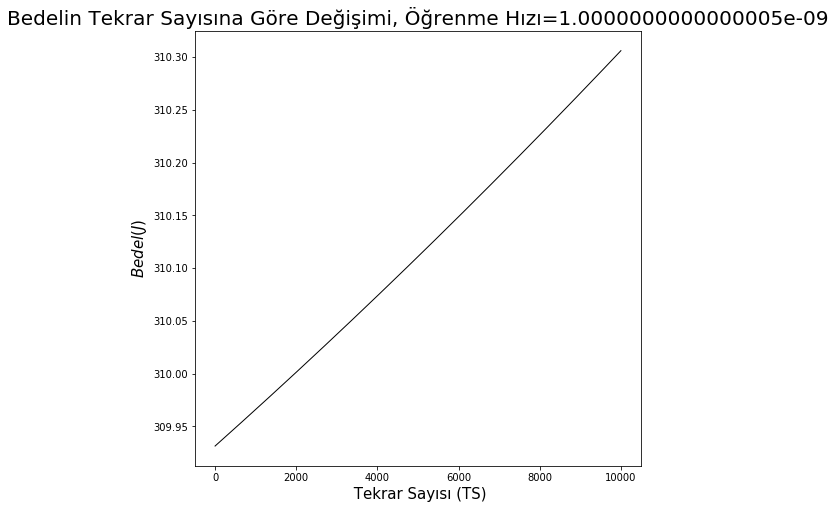

In [57]:
plt.figure(figsize=(8,8))
title="Bedelin Tekrar Sayısına Göre Değişimi, Öğrenme Hızı="+str(a)
plt.title(title,fontsize="20")
plt.ylabel("$Bedel(J) $",fontsize=15)
plt.xlabel(" Tekrar Sayısı (TS)",fontsize=15)
plt.plot(bedel_df["index"],bedel_df["Bedel"], 'k-',linewidth=1,markersize=18)
plt.show()

In [58]:
from scipy import optimize
x=örnek_veri[örnek_nitelik_listesi];indeks_x=x.index; 
seed(23)
xr=pd.DataFrame( np.random.random((x.shape[0], x.shape[1])))
x_veri=np.array(((np.array((np.isnan(x))*1)*xr)+1))
x=pd.DataFrame(x_veri,index=indeks_x,columns=örnek_nitelik_listesi)
theta_=pd.DataFrame( np.random.random((len(x.columns), len(y.columns))),index=x.columns,columns=y.columns)
param=np.array(np.concatenate(x.values).tolist()+np.concatenate(theta_.values).tolist())
bedel(param,y_norm,n,lambda_)

306.39342957210494

In [59]:
opts = {'maxiter' : 5000,    # default value.
         'disp' : True,    # non-default value.
          'gtol' : 1e-5,    # default value.
         'norm' : np.inf,  # default value.
          'eps' : 1.4901161193847656e-08}

In [60]:
res1 = optimize.minimize(bedel,x0=param,jac=derece,args=(y_norm,n,lambda_), method='Nelder-Mead', options=opts)

C:\Users\onur.bilgic\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:500: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  RuntimeWarning)
C:\Users\onur.bilgic\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: OptimizeWarning: Unknown solver options: gtol, norm, eps
  """Entry point for launching an IPython kernel.


In [61]:
res1.fun

275.98666651475327

In [62]:
bedel(res1.x,y_norm,n,lambda_)

275.98666651475327

In [63]:
nm=y.shape[0]

nu=y.shape[1]

r=-np.isnan(y_norm)*1

y_norm=y_norm.fillna(0)

X_n=res1.x[:nm*n].reshape(nm,n) 

theta_n=res1.x[nm*n:].reshape(n,nu)
h=pd.DataFrame(np.dot(X_n,theta_n),index=y.index,columns=y.columns.tolist())
for i in h.columns:
    h[i]=h[i]+y_ort
    
h.head(3)

,610(theta0),448(theta1),599(theta2),474(theta3),414(theta4),380(theta5),274(theta6),606(theta7)
title,,,,,,,,
Apocalypse Now (1979),7.065834,6.693246,7.801963,6.659191,6.867403,8.425863,7.740939,7.862039
Batman (1989),6.612264,6.183565,7.312222,6.076483,6.215120,8.150290,7.207626,7.153452
Beverly Hills Cop (1984),6.461247,6.069299,7.565611,5.921101,6.268979,7.597696,6.650522,7.507279
